In [92]:
import numpy as np
import pandas as pd
from astropy import table
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt 
from astropy import units as u
from astroquery.xmatch import XMatch
from astropy.table import Table, unique,vstack

In [93]:
def freedman_diaconis_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    return int((np.max(data) - np.min(data)) / bin_width)

In [94]:
data1 = Table.read('xmatch_planets.csv', format='ascii.csv')
data2 = Table.read('xmatch+2.csv', format='ascii.csv')

C:\Users\ylana\AppData\Local\Temp\ipykernel_4892\1852881933.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 500)


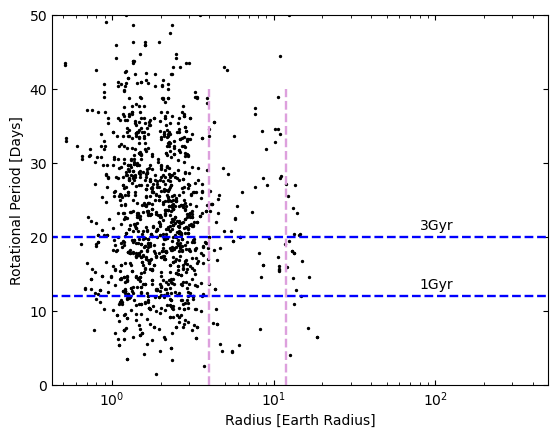

In [95]:
plt.scatter(data1['pl_rade'], data1['Prot'], s = 2, c = 'black') #data1['Teff'])
plt.scatter(data2['pl_rade'], data2['Prot'], s = 2, c = 'black') #data2['Teff'])

#plt.scatter(mcquillan_koi['Rp'], mcquillan_koi['Prot'], s = 2, c = 'black') #data2['Teff'])

#plt.yscale("log")
plt.xscale("log")
plt.ylim(0,50)
plt.xlim(0, 500)
plt.xlabel("Radius [Earth Radius]")
plt.ylabel("Rotational Period [Days]")
plt.hlines(12, 0, 1000, color = 'blue', linestyle = '--', linewidth=1.7)
plt.hlines(20, 0, 1000, color = 'blue', linestyle = '--', linewidth=1.7)

plt.vlines(4, 0, 40, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(12, 0, 40, color = 'plum', linestyle = '--', linewidth=1.7)


plt.text(80,13 , "1Gyr")
plt.text(80, 21 , "3Gyr")

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

In [123]:
all_data = vstack([data1, data2], join_type='inner')



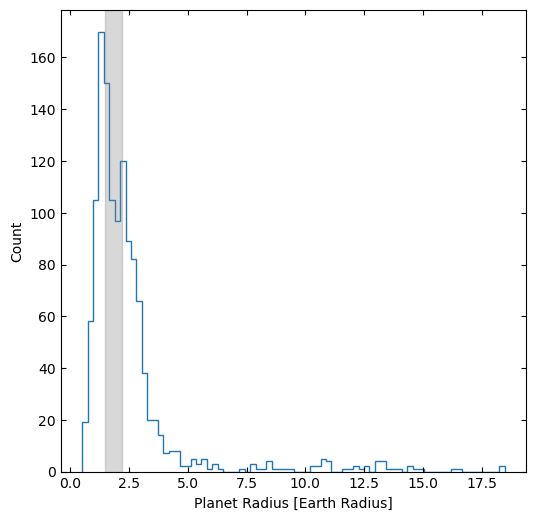

In [97]:
num_bins = freedman_diaconis_bins(all_data['pl_rade'])

## plotando figura

plt.figure(figsize=(6,6))
h, edges = np.histogram(all_data['pl_rade'],bins=num_bins)
plt.stairs(h, edges, label='Simple histogram')
#plt.xlim(0,20)

plt.axvspan(1.5, 2.2, alpha=0.3, color='gray')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.ylabel('Count')
plt.xlabel('Planet Radius [Earth Radius]')
plt.show()

In [98]:
plot4 = all_data[all_data['pl_bmasse'] != 0 ]
plot4 = plot4[plot4['pl_dens'] != 0 ]

plot4 = plot4.to_pandas()

plot4 = plot4.dropna(subset=['pl_bmasse', 'pl_dens'])

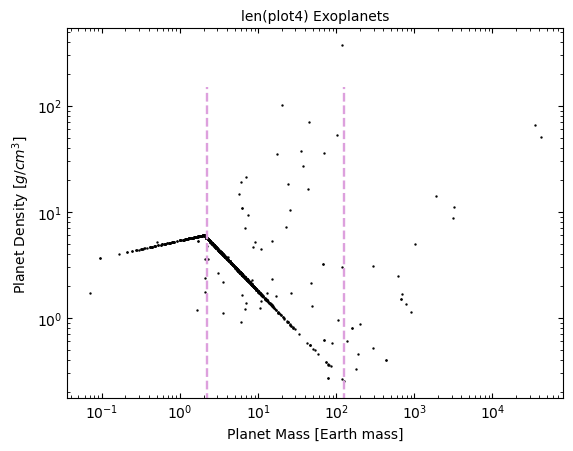

In [99]:
plt.scatter(plot4['pl_bmasse'], plot4['pl_dens'],
           s = 0.5,
           c = 'black')

plt.vlines(127, 0, 150, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(2.2, 0, 150, color = 'plum', linestyle = '--', linewidth=1.7)
plt.xscale("log")
plt.yscale("log")

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel("Planet Mass [Earth mass]")
plt.ylabel(r'Planet Density $[g/cm^3]$')
plt.title(r"len(plot4) Exoplanets", fontsize = 10)
plt.savefig('mass_densitu.png', dpi=500)

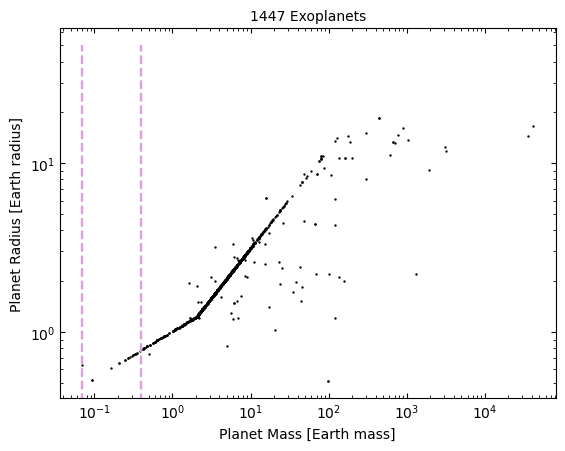

In [100]:
plt.scatter(all_data['pl_bmasse'], all_data['pl_rade'],
           s = 0.5,
           c = 'black')

plt.vlines(0.4, 0, 50, color = 'plum', linestyle = '--', linewidth=1.7)
plt.vlines(0.07, 0, 50, color = 'plum', linestyle = '--', linewidth=1.7)

plt.xscale("log")
plt.yscale("log")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlabel("Planet Mass [Earth mass]")
plt.ylabel("Planet Radius [Earth radius]")
plt.title("1447 Exoplanets", fontsize = 10)
plt.savefig('mass_radius.png', dpi=500)

C:\Users\ylana\AppData\Local\Temp\ipykernel_4892\1628860711.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1e5)


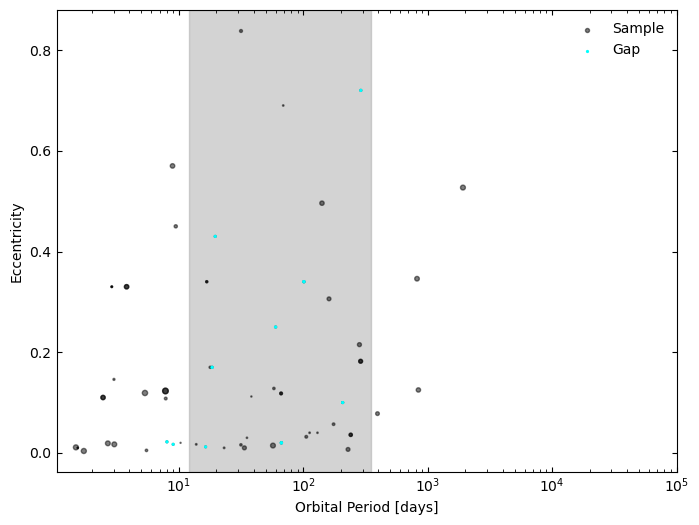

In [101]:
teste = all_data[all_data['pl_orbeccen'] != 0]
res1 = teste[(teste['pl_rade'] > 1.6) & (teste['pl_rade'] < 2.3)]

plt.figure(figsize=(8,6))

plt.axvspan(12, 350, alpha=0.5, color='darkgray')

plt.scatter(teste['pl_orbper'], teste['pl_orbeccen'], s =  teste['pl_radj'] * 10, 
            c = 'black', marker = 'o', alpha = 0.5, label = 'Sample') 

plt.scatter(res1['pl_orbper'], res1['pl_orbeccen'], s =  res1['pl_radj'] * 10, 
            c = 'aqua', marker = 'o', label = 'Gap') 

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xscale('log')
plt.xlim(0,1e5)
plt.xlabel('Orbital Period [days]')
plt.ylabel('Eccentricity')
plt.legend(frameon=False)

plt.savefig('e_vs_orb_sample.png', dpi=500)


plt.show()


In [114]:
Vizier.ROW_LIMIT=-1
mcquillan_koi = Vizier.get_catalogs("J/ApJ/775/L11")[0]

In [115]:
mcquillan_koi = mcquillan_koi[mcquillan_koi['Porb'] != 0 ]
mcquillan_koi = mcquillan_koi[mcquillan_koi['Prot'] != 0 ]

mcquillan_koi = mcquillan_koi.to_pandas()

mcquillan_koi = mcquillan_koi.dropna(subset=['Prot', 'Porb', 'Teff'])

In [113]:
#mcquillan_koi = mcquillan_koi[(mcquillan_koi['Rp'] < 2.1) & (mcquillan_koi['Rp'] > 1.7)]


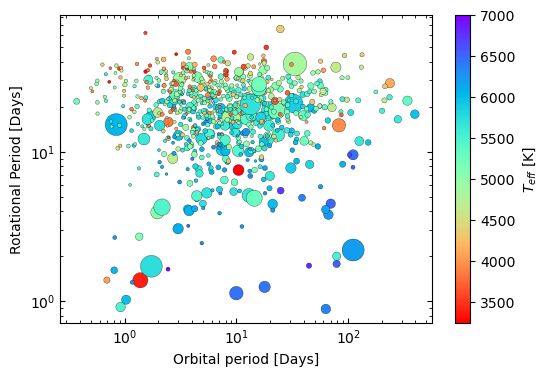

In [116]:
plt.figure(figsize=(6,4))
fig = plt.scatter(mcquillan_koi['Porb'], mcquillan_koi['Prot'], s = mcquillan_koi['Rp']*5 ,cmap = 'rainbow_r', c = mcquillan_koi['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')
#plt.legend(*fig.legend_elements("sizes", num=3))

#plt.savefig('orb_vs_rot.png', dpi=500)


In [117]:
mcquillan_koi[mcquillan_koi['Prot'] < 2]

,KOI,KIC,Teff,log_g_,Rp,Porb,Prot,e_Prot,Rvar,Flag,Simbad,_RA,_DE
1,12,5812701,6419,4.26,13.40,17.855,1.245,0.124,0.780000,,Simbad,297.45374,41.01099
11,100,4055765,6440,3.69,19.00,9.966,1.131,0.000,0.850000,,Simbad,291.17792,39.19949
45,256,11548140,3410,4.90,24.00,1.379,1.379,0.000,47.740002,E,Simbad,285.18512,49.56537
206,823,5115978,5976,4.43,8.70,1.028,1.022,0.000,8.600000,E,Simbad,296.00699,40.29543
282,1255,8494263,5521,4.79,7.20,78.925,1.998,0.001,4.580000,C,Simbad,291.44522,44.52869
312,1459,9761199,4060,4.40,4.12,0.692,1.383,0.000,4.160000,E,Simbad,287.14313,46.50806
326,1546,5475431,5505,4.97,9.50,0.918,0.913,0.000,15.200000,E,Simbad,298.51370,40.63962
353,1701,7222086,7065,4.07,1.73,2.439,1.637,0.000,0.370000,,Simbad,297.51907,42.77706
374,1799,6058614,5735,4.61,49.00,1.731,1.711,0.000,30.309999,T,Simbad,296.30573,41.31712
382,1812,6279974,6022,4.41,4.80,0.805,1.609,0.000,0.640000,T,Simbad,290.12653,41.60108


In [118]:
temp1 = mcquillan_koi[(mcquillan_koi['Teff'] < 4000) & (mcquillan_koi['Teff'] > 0)]
temp2 = mcquillan_koi[(mcquillan_koi['Teff'] < 5000) & (mcquillan_koi['Teff'] > 4000)]
temp3 = mcquillan_koi[(mcquillan_koi['Teff'] < 6000) & (mcquillan_koi['Teff'] > 5000)]
temp4 = mcquillan_koi[mcquillan_koi['Teff'] > 6000]

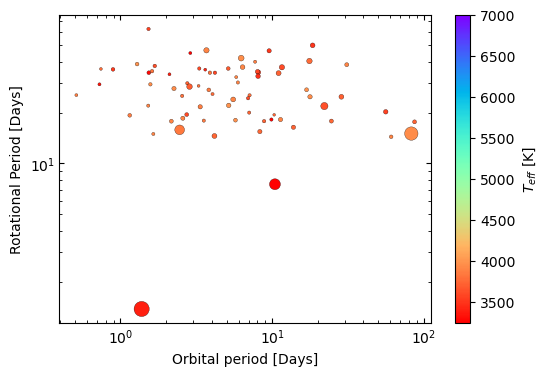

In [119]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp']*5 ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')


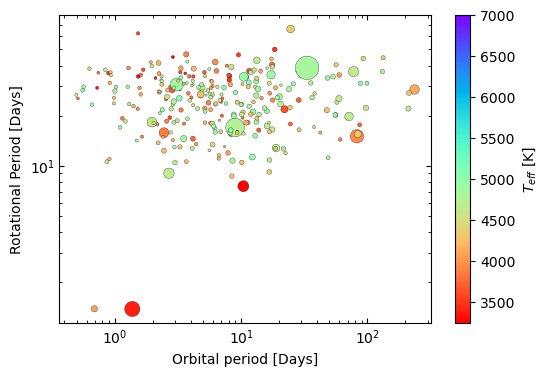

In [120]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp']*5 ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp']*5 ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

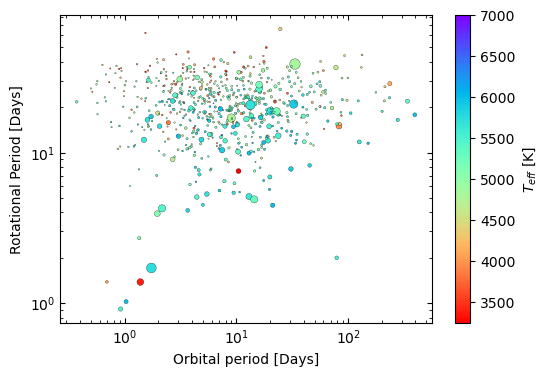

In [121]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp'] ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp'] ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp3['Porb'], temp3['Prot'], s = temp3['Rp'] ,cmap = 'rainbow_r', c = temp3['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

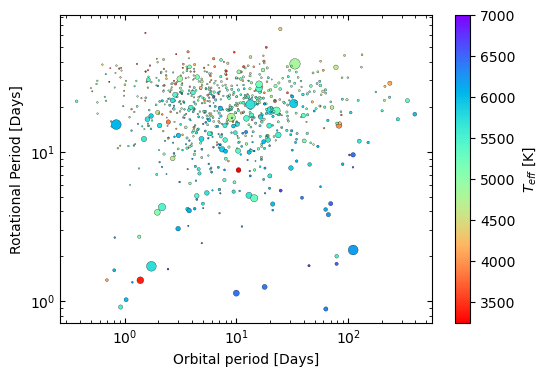

In [122]:
plt.figure(figsize=(6,4))
plt.scatter(temp1['Porb'], temp1['Prot'], s = temp1['Rp'] ,cmap = 'rainbow_r', c = temp1['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp2['Porb'], temp2['Prot'], s = temp2['Rp'] ,cmap = 'rainbow_r', c = temp2['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp3['Porb'], temp3['Prot'], s = temp3['Rp'] ,cmap = 'rainbow_r', c = temp3['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(temp4['Porb'], temp4['Prot'], s = temp4['Rp'] ,cmap = 'rainbow_r', c = temp4['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)

plt.colorbar(label = r'$T_{eff}$ [K]')

In [125]:
sample = all_data[all_data['pl_orbper'] != 0]
sample = sample[sample['st_rotp'] != 0]

In [136]:
sample_mini = all_data[(all_data['pl_rade'] > 1.8) & (all_data['pl_rade'] < 2.2)]

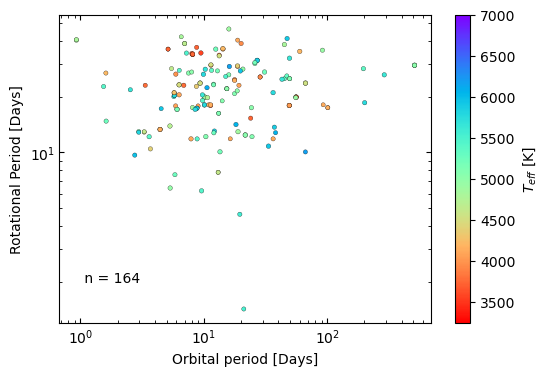

In [146]:
plt.figure(figsize=(6,4))
#plt.scatter(sample['pl_orbper'], sample['Prot'], s = sample['pl_rade']*2 ,cmap = 'rainbow_r', c = sample['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(sample_mini['pl_orbper'], sample_mini['Prot'], s = sample_mini['pl_rade']*5 ,cmap = 'rainbow_r', c = sample_mini['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])


plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.annotate(f" n = { len(sample_mini) }",[1,2],fontsize=10)


plt.colorbar(label = r'$T_{eff}$ [K]')

In [147]:
sample_primordial = pd.read_csv('all_planets.csv')

sample_primordial.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,5756.000000,5756.000000,5756.000000,5756.000000,5.480000e+03,4.979000e+03,4.979000e+03,5480.000000,5475.000000,2863.000000,...,5422.000000,5517.000000,5509.000000,5503.000000,5526.000000,5490.000000,5478.000000,5469.000000,5467.000000,5467.000000
mean,1.104065,1.766157,2016.415566,0.005212,7.805236e+04,9.612077e+04,-2.195251e+04,-0.000730,16.039629,2.356508,...,-0.052833,12.605862,0.100670,-0.102275,10.463569,0.042592,-0.042613,12.319828,0.000642,-0.000642
std,0.344414,1.150624,4.651429,0.072012,5.432986e+06,6.661132e+06,1.419306e+06,0.038205,359.828197,97.483155,...,0.260714,3.088077,0.138744,0.207147,3.022716,0.261055,0.267160,2.985630,0.001822,0.001822
min,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,0.000000,...,-16.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.063232
25%,1.000000,1.000000,2014.000000,0.000000,4.417637e+00,1.400000e-05,-1.572000e-03,0.000000,0.052900,0.000860,...,-0.045338,10.769000,0.030000,-0.126000,8.449000,0.020000,-0.031000,10.454000,0.000257,-0.000538
50%,1.000000,1.000000,2016.000000,0.000000,1.139097e+01,9.392000e-05,-9.543000e-05,0.000000,0.102900,0.002700,...,-0.030159,13.403000,0.080000,-0.080000,11.311500,0.023000,-0.023000,13.148000,0.000364,-0.000364
75%,1.000000,2.000000,2020.000000,0.000000,4.043137e+01,1.552000e-03,-1.400000e-05,0.000000,0.300400,0.034000,...,-0.022198,14.986000,0.126000,-0.030000,12.814000,0.031000,-0.020000,14.755500,0.000538,-0.000257
max,4.000000,8.000000,2024.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,5205.000000,...,-0.011737,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.063232,-0.000118


In [148]:
sample = sample_primordial[sample_primordial['pl_orbper'] != 0]
sample = sample_primordial[sample_primordial['st_rotp'] != 0]
sample = sample_primordial[(sample_primordial['pl_rade'] > 1.8) & (sample_primordial['pl_rade'] < 2.2)]


In [150]:
sample['st_teff']

Index(['pl_name', 'hostname', 'pl_letter', 'hd_name', 'tic_id', 'sy_snum',
       'sy_pnum', 'discoverymethod', 'disc_year', 'disc_refname',
       ...
       'sy_plxerr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag',
       'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamag', 'sy_gaiamagerr1',
       'sy_gaiamagerr2'],
      dtype='object', length=194)

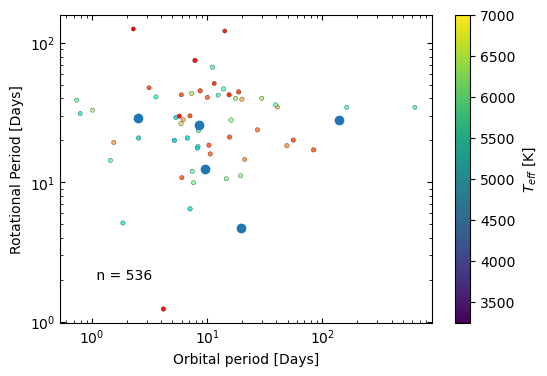

In [178]:
plt.figure(figsize=(6,4))
plt.scatter(sample['pl_orbper'], sample['st_rotp'], s = sample['pl_rade']*5 ,cmap = 'rainbow_r', c = sample['st_teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
#plt.scatter(sample_mini['pl_orbper'], sample_mini['Prot'], s = sample_mini['pl_rade']*5 ,cmap = 'rainbow_r', c = sample_mini['Teff'], ec = 'black', lw = 0.2).set_clim(3250, 7000) #data2['Teff'])
plt.scatter(ages['pl_orbper'], ages['st_rotp']).set_clim(3250, 7000) #data2['Teff'])



plt.xscale("log")
plt.yscale("log")
plt.xlabel("Orbital period [Days]")
plt.ylabel("Rotational Period [Days]")
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.annotate(f" n = { len(sample) }",[1,2],fontsize=10)


plt.colorbar(label = r'$T_{eff}$ [K]')

In [156]:
new_netunos = sample[sample['pl_orbeccen'] > 0.2]
new_netunos

,pl_name,hostname,pl_letter,hd_name,tic_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_refname,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
211,GJ 2030 b,GJ 2030,b,NaN,TIC 9967949,1,2,Radial Velocity,2022,<a refstr=FENG_ET_AL__2022 href=https://ui.ads...,...,-0.046595,6.20902,0.023,-0.023,4.417,0.027,-0.027,6.02088,0.000769,-0.000769
223,GJ 3090 b,GJ 3090,b,NaN,TIC 262530407,1,1,Transit,2022,<a refstr=ALMENARA_ET_AL__2022 href=https://ui...,...,-0.051205,11.40300,0.026,-0.026,7.294,0.026,-0.026,10.55210,0.000938,-0.000938
273,GJ 514 b,GJ 514,b,NaN,TIC 404519959,1,1,Radial Velocity,2022,<a refstr=DAMASSO_ET_AL__2022 href=https://ui....,...,-0.054277,9.05000,0.100,-0.100,5.036,0.027,-0.027,8.20621,0.000711,-0.000711
880,HD 20794 e,HD 20794,e,HD 20794,TIC 301051051,1,4,Radial Velocity,2017,<a refstr=FENG_ET_AL__2017 href=https://ui.ads...,...,-0.234780,4.26000,0.030,-0.030,2.636,0.278,-0.278,4.06635,0.005102,-0.005102
990,HD 28109 b,HD 28109,b,HD 28109,TIC 29781292,1,3,Transit,2022,<a refstr=DRANSFIELD_ET_AL__2022 href=https://...,...,-0.021784,9.42000,0.030,-0.030,8.175,0.023,-0.023,9.29976,0.000323,-0.000323
1052,HD 39194 b,HD 39194,b,HD 39194,TIC 389506883,1,3,Radial Velocity,2021,<a refstr=UNGER_ET_AL__2021 href=https://ui.ad...,...,-0.037741,8.09000,0.030,-0.030,6.094,0.020,-0.020,7.85201,0.000243,-0.000243
1054,HD 39194 d,HD 39194,d,HD 39194,TIC 389506883,1,3,Radial Velocity,2021,<a refstr=UNGER_ET_AL__2021 href=https://ui.ad...,...,-0.037741,8.09000,0.030,-0.030,6.094,0.020,-0.020,7.85201,0.000243,-0.000243
1228,HD 93385 b,HD 93385,b,HD 93385,TIC 106900981,1,3,Radial Velocity,2021,<a refstr=UNGER_ET_AL__2021 href=https://ui.ad...,...,-0.034248,7.49000,0.030,-0.030,6.065,0.023,-0.023,7.33769,0.000156,-0.000156
1344,HR 858 b,HR 858,b,HD 17926,TIC 178155732,2,3,Transit,2019,<a refstr=VANDERBURG_ET_AL__2019 href=https://...,...,-0.070025,6.38000,0.030,-0.030,5.149,0.020,-0.020,6.25276,0.000426,-0.000426
1346,HR 858 d,HR 858,d,HD 17926,TIC 178155732,2,3,Transit,2019,<a refstr=VANDERBURG_ET_AL__2019 href=https://...,...,-0.070025,6.38000,0.030,-0.030,5.149,0.020,-0.020,6.25276,0.000426,-0.000426


In [177]:
ages = new_netunos[new_netunos['st_age'] != 0]
ages = ages[ages['st_age'] < 7]

ages = ages.dropna(subset=['st_age'])


ages.describe()


,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_plxerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.0,2.090909,2020.181818,0.0,48.159924,0.167560,-0.120275,0.0,0.192054,0.012455,...,-0.050160,10.795182,0.052182,-0.052182,8.393636,0.044727,-0.044727,10.465295,0.000930,-0.000930
std,0.0,1.044466,3.544522,0.0,55.571495,0.436367,0.289323,0.0,0.153912,0.020047,...,0.062133,3.370006,0.048760,0.048760,2.951950,0.077409,0.077409,3.303194,0.001418,0.001418
min,1.0,1.000000,2013.000000,0.0,2.527093,0.000004,-0.910000,0.0,0.028500,0.000400,...,-0.234780,4.260000,0.004000,-0.172000,2.636000,0.018000,-0.278000,4.066350,0.000156,-0.005102
25%,1.0,1.000000,2019.000000,0.0,8.998506,0.000028,-0.000940,0.0,0.077440,0.001300,...,-0.042155,9.235000,0.025500,-0.069000,7.120000,0.019500,-0.023000,8.752985,0.000345,-0.000681
50%,1.0,2.000000,2022.000000,0.0,19.577830,0.000350,-0.000360,0.0,0.135700,0.003400,...,-0.027398,10.748000,0.030000,-0.030000,8.598000,0.021000,-0.021000,10.488300,0.000380,-0.000380
75%,1.0,3.000000,2022.000000,0.0,80.494485,0.001035,-0.000028,0.0,0.245305,0.011820,...,-0.023568,13.069000,0.069000,-0.025500,10.195000,0.023000,-0.019500,12.586850,0.000681,-0.000345
max,1.0,4.000000,2024.000000,0.0,147.020000,1.430000,-0.000003,0.0,0.509000,0.066000,...,-0.021784,15.637000,0.172000,-0.004000,12.272000,0.278000,-0.018000,15.105800,0.005102,-0.000156
